# Book-Crossing Similarity Based Recommender System

### Objective: 
>To construct a recommender system based on the similarity between Users/Readers who have bought/read a specific book to those Users/Readers who have bought/read the books other than the specified book and sort them by Jaccard Similarity.

### Segments:
>1. Data Preprocessing
2. Data Visualization
3. Similarity-based Recommender System

## About the Dataset
For this project, I have used three datasets from Kaggle's [Book-Crossing: User review ratings](https://https://www.kaggle.com/ruchi798/bookcrossing-dataset) 

It was prepared by [Ruchi Bhatia](https://https://www.kaggle.com/ruchi798), a Datasets Grandmaster and a Notebooks Expert at Kaagle and professionally **Data Science Global Ambassador at HP & NVIDIA, Mumbai, India**

This dataset contains 278,858 users (anonymized but with demographic information) providing 1,149,780 ratings (explicit / implicit) about 271,379 books. 

The datasets contained in it are:
- Book-Ratings: It contains 1,149,779 data elements which provides the rating value of each Book read by each User. The rating is provided on a scale of Integers from 0 to 10.
- Books: It contains 271,379 Registered Books and their details in the form of ISBN, Book-Title, Book-Author, Year Of Publication, Publisher and different Cover Page Image Links for each book.
- Users: It contains 278,858 unique users/Readers who have read and rated any book they have read. It also contains the Age and Location of the User.

# Data Preprocessing

In this segment, I did the following processes:
* Imported the required Libraries
* Read the .csv files present in my Google Drive
* Removed the Image columns from the Books dataset and merged all the 3 `pandas DataFrames` together to form a single DataFrame containing 1031136 data elements and 9 features
* Cleaned the dataset:
    - Null Values - I `dropped` all the rows containing null values
    - Data Types - I `converted` the data types of the UserID and Age features to `int` type from `object` type
    - Location feature - I split the Location feature of the DataFrame into `city`, `states` and `country` features for better usability

## Imports

In [1]:
import numpy as np # linear algebra and numerical operations
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random
from collections import defaultdict

import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Reading csv files

In [2]:
#Users
users = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Dataset/Book reviews/BX-Users.csv', 
                    sep=';', error_bad_lines=False, encoding='latin-1',low_memory=False)

#Books
items = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Dataset/Book reviews/BX-Books.csv', 
                    sep=';', error_bad_lines=False, encoding='latin-1',low_memory=False)

#Ratings
ratings = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Dataset/Book reviews/BX-Book-Ratings.csv', 
                      sep=';', error_bad_lines=False, encoding='latin-1',low_memory=False)

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\nSkipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\nSkipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\nSkipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'


In [3]:
users.head(5)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [4]:
items.head(5)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
ratings.head(5)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [6]:
print(users.shape, items.shape, ratings.shape)

(278858, 3) (271360, 8) (1149780, 3)


## Merging the dataframes

In [7]:
items.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis=1, inplace=True)

In [8]:
df = pd.merge(users, ratings, on='User-ID')
df = pd.merge(df, items, on='ISBN')
df.head(5)

,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,2,"stockton, california, usa",18.0,0195153448,0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,8,"timmins, ontario, canada",NaN,0002005018,5,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,11400,"ottawa, ontario, canada",49.0,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
3,11676,"n/a, n/a, n/a",NaN,0002005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
4,41385,"sudbury, ontario, canada",NaN,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada


In [9]:
df.shape

(1031136, 9)

In [10]:
#df = df.sample(frac=0.5)

## Dropping null values

In [11]:
df.isnull().sum()

User-ID                     0
Location                    0
Age                    277835
ISBN                        0
Book-Rating                 0
Book-Title                  0
Book-Author                 1
Year-Of-Publication         0
Publisher                   2
dtype: int64

In [12]:
df.dropna(how='any', axis=0, inplace=True)
df.shape

(753298, 9)

In [13]:
df.describe()

,User-ID,Age,Book-Rating
count,753298.000000,753298.000000,753298.000000
mean,141231.317098,37.397625,2.768898
std,78828.553360,14.098256,3.864231
min,2.000000,0.000000,0.000000
25%,74453.000000,28.000000,0.000000
50%,141493.000000,35.000000,0.000000
75%,209156.000000,45.000000,7.000000
max,278852.000000,244.000000,10.000000


## Changing datatypes

In [14]:
df['Age'] = df['Age'].astype(int)
df['User-ID'] = df['User-ID'].astype(int)

## Spitting location column into newer columns

In [15]:
location = df.Location.str.split(', ', n=2, expand=True)
location.columns=['city', 'state', 'country']

df['city'] = location['city']
df['state'] = location['state']
df['country'] = location['country']
df.drop('Location', axis=1, inplace=True)

In [16]:
df.isna().sum()

User-ID                    0
Age                        0
ISBN                       0
Book-Rating                0
Book-Title                 0
Book-Author                0
Year-Of-Publication        0
Publisher                  0
city                       0
state                      0
country                10635
dtype: int64

# Visual Analysis of Distribution of Numerical Data

In this segment, I visualized the distribution of the Numerical features with respect to each other using a pair plot with scatter plot as the function to check the extent and quality of the pre-processing done.

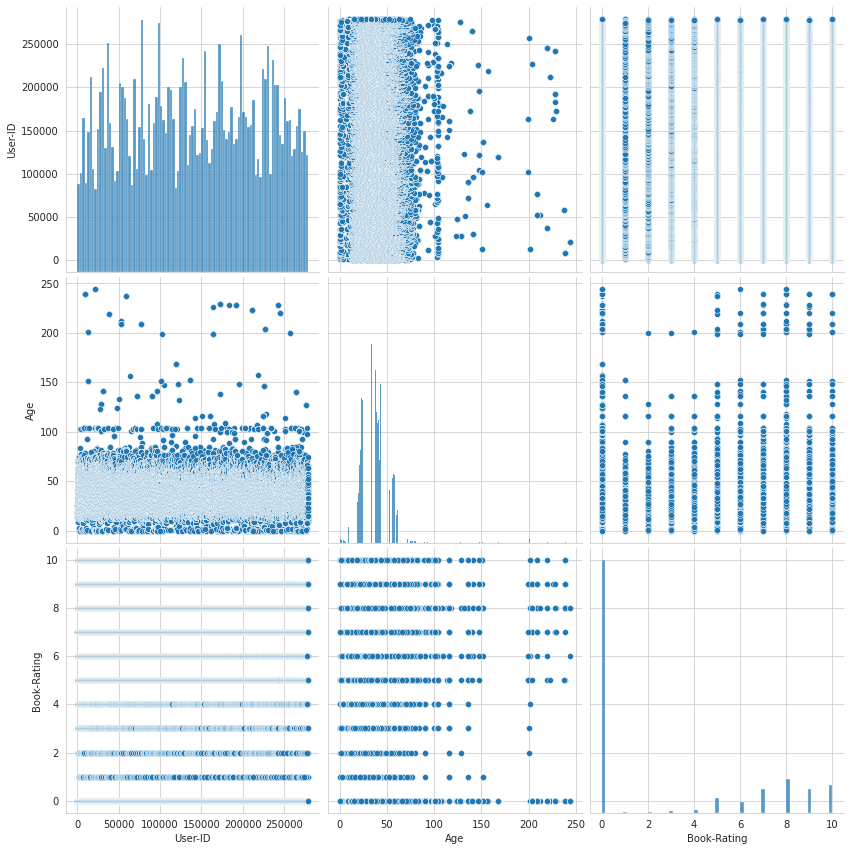

In [17]:
sns.set_style("whitegrid")
sns.pairplot(df, height=4)

# Similarity-Based Recommender System


In this segment, I did the following processes:
- Defining Useful Data Structures
- Finding Similarities using Jaccard Similarity
- Getting a Recommendation
- Collaborative-Filtering based Rating Prediction
- Evaluating Performance of our Recommender System using Mean-Squared Error

### Defining Useful Data Structures

In [18]:
users = df['User-ID'].unique()
items = df['ISBN'].unique()

In [19]:
usersPerItem = defaultdict(set)
itemsPerUser = defaultdict(set)

itemNames = {}
dataset = df.values

for d in dataset:
    #user,item = d['customer_id'], d['product_id']
    usersPerItem[d[2]].add(d[0])
    itemsPerUser[d[0]].add(d[2])
    itemNames[d[2]] = d[4]

### Finding Similarities

As stated before, first, i, defined the Jaccard function which calculates the Jaccard Similarity between two Sets

Then, I defined the mostSimilar function which will use Jaccard Similarity to find the Books that are **most similar to the Book that was provided on the basis of Users who read that book.**

#### Jaccard Similarity Function
 $$J(A, B) = \frac{|A \cap B|}{|A \cup B|} $$

In [20]:
def Jaccard(s1, s2):
    numer = len(s1.intersection(s2))
    denom = len(s1.union(s2))
    return numer / denom

#### Function to determine what is similar within the dataset
**It's sufficient to iterate over those items purchased by one of the users who purchased i**

### Strategy:
* Find the set of users who purchased item i
* Iterate over all **users** other than i
* Build a candidate set from all items those users consumed
* For items in this set, compute their similarity with i and store it
* Sort all the other items by Jaccard similarity
 $$J(U_{i}, U_{j}) = \frac{|U_{i} \cap U_{j}|}{|U_{i} \cup U_{j}|} $$
* Return the most similar

In [21]:
def mostSimilar(iD, n):
    similarities = []
    user = usersPerItem[iD]
    candidateItems = set()
    for u in user:
        candidateItems = candidateItems.union(itemsPerUser[u])
    for i2 in candidateItems:
        if i2 == iD: continue
        sim = Jaccard(user, usersPerItem[i2])
        similarities.append((sim, i2))
    similarities.sort(reverse = True)
    return similarities[:n]

### Collaborative-Filtering-Based Rating Prediction

I also used the similarity-based recommender I developed above to make predictions about reader's ratings. It is a simple heuristic that can be used to estimate a user's future ratings based on their ratings in the past.

Specifically, a user's rating for a book is assumed to be a weighted sum of their previous ratings, weighted by how similar the query book is to each of their previous purchases.

I start by building a few more utility data structures to keep track of all of the reviews by each user and for each item.

In [30]:
reviewsPerUser = defaultdict(list)
reviewsPerItem = defaultdict(list)

for d in dataset:
    reviewsPerUser[d[0]].append(d)
    reviewsPerItem[d[2]].append(d)

In [31]:
# Calculates the mean rating of the entire dataset
ratingMean = np.sum(dataset[:, 3]) / len(dataset)
ratingMean

2.7688975677620276

#### Now that I have calculated the average rating of the dataset as a whole, I am going to implement a function which predicts Rating based on a user and an item.

### For predicting the rating of an item by an user:
##$$r(u, i) = \frac{1}{Z}.\sum\limits_{j \in I_{u}{\\i}} r_{u,j}.sim(i, j)  $$

In [32]:
def predictRating(user,item):
    ratings = []
    similarities = []
    for d in reviewsPerUser[user]:
        i2 = d[2]
        if i2 == item: continue
        ratings.append(d[3])
        similarities.append(Jaccard(usersPerItem[item],usersPerItem[i2]))
    ratings = np.array(ratings)
    similarities = np.array(similarities)
    if (sum(similarities) > 0):
        return np.sum(ratings*similarities) / np.sum(similarities)
    else:
        # User hasn't rated any similar books
        return ratingMean

In [34]:
'''
#To find the index of Users who hasn't rated similar books
#This is calculated just for confirmation
c = []
for d in dataset[:100]:
    if len(reviewsPerUser[d[0]])<2:
        c.append(np.where(dataset == d[0])[0][0])
c[:10]
'''

"\nTo find the index of Users who hasn't rated similar books\nc = []\nfor d in dataset[:100]:\n    if len(reviewsPerUser[d[0]])<2:\n        c.append(np.where(dataset == d[0])[0][0])\nc[:10]\n"

In [35]:
dataset[0]

array([2, 18, '0195153448', 0, 'Classical Mythology',
       'Mark P. O. Morford', '2002', 'Oxford University Press',
       'stockton', 'california', 'usa'], dtype=object)

In [36]:
# Using the predictRating function defined above, calculated the predicted rating 
#for the user at index [0] where the user hasn't rated any more books than 1

user,item = dataset[0][0], dataset[0][2]
predictRating(user, item)

2.7688975677620276

In this case our user hasn't rated any similar books, so our function defaults to returning the dataset Mean Rating.

In [37]:
# Calculated the predicted rating for the user at index [14] where the user has rated more books

user,item = dataset[14][0], dataset[14][2]
predictRating(user, item)

1.7187230371009492

In this case, answer differs by a lot from the above

### Evaluating Performance

Here, I tried evaluating our Similarity-based Recommender System using the Mean-Squared Error metric

#### Defining our Mean-Squared Error function

In [38]:
def MSE(predictions, labels):
    return np.sum((np.array(predictions) - np.array(labels))**2) / len(labels)

To evaluate the performance of our model, we will need two things:
1. A list of the average Rating (i.e. ratingMean)
2. A list of our predicted ratings (i.e. ratings defined by our predictRating function)

In [42]:
#Defined the two lists described above
alwaysPredictMean = [ratingMean for d in dataset[:400000]]

cfPredictions = [predictRating(d[0], d[2]) for d in dataset[:400000]]

#predictRatingVecotrized = np.vectorize(predictRating)
#cfPredictions = predictRatingVecotrized(dataset[:, [0]], dataset[:, [2]])

#### Finally, we will compare our two lists above with the actual star ratings in our dataset.

In [43]:
labels = [d[3] for d in dataset[:400000]]

print(MSE(alwaysPredictMean, labels), MSE(cfPredictions, labels))

15.238928914209085 12.35916374197867


#### The Error decreased 3 units from using our predictRating function rather than using just the Average Rating from the dataset.

#### In this case, I'm getting such high error because I only used the first 400,000 samples from the original data for the sake of faster computation. So, its clearly understandable that the error will be a lot less if the full dataset is used.

### Getting a recommendation

The mostSimilar function above takes an input of an `ISBN` of a specific book and a value `n` which is the number of similar Books to recommend, then outputs a list of size `n` with the recommended `ISBN`'s.

We use these `ISBN`'s to print the `Book-Title` of each ISBN for recommendation

In [44]:
query = df[df['Book-Title'] == "The Testament"].iloc[1].ISBN

In [45]:
itemNames[query]

'The Testament'

In [46]:
[itemNames[x[1]] for x in mostSimilar(query, 10)]

['The Partner',
 'The Street Lawyer',
 'The Rainmaker',
 'The Brethren',
 'The Client',
 'The Chamber',
 'The Firm',
 'A Time to Kill',
 'The Pelican Brief',
 'The Runaway Jury']

In [47]:
print(df[df['Book-Title'] == "The Testament"].iloc[1]['Book-Author'])
print(df[df['Book-Title'] == "The Partner"].iloc[1]['Book-Author'])
print(df[df['Book-Title'] == "The Rainmaker"].iloc[1]['Book-Author'])
print(df[df['Book-Title'] == "The Chamber"].iloc[1]['Book-Author'])

John Grisham
John Grisham
JOHN GRISHAM
John Grisham


In [48]:
query = df[df['Book-Title'] == "The Da Vinci Code"].iloc[1].ISBN

In [49]:
[itemNames[x[1]] for x in mostSimilar(query, 10)]

['Angels &amp; Demons',
 'The Lovely Bones: A Novel',
 'The Secret Life of Bees',
 'The Five People You Meet in Heaven',
 'The Red Tent (Bestselling Backlist)',
 'Divine Secrets of the Ya-Ya Sisterhood: A Novel',
 'Harry Potter and the Order of the Phoenix (Book 5)',
 'Snow Falling on Cedars',
 'Life of Pi',
 'Good in Bed']

In [50]:
print(df[df['Book-Title'] == "The Da Vinci Code"].iloc[1]['Book-Author'])
print(df[df['Book-Title'] == "Angels &amp; Demons"].iloc[1]['Book-Author'])

Dan Brown
Dan Brown


#### Observation:
When I checked the Author for the query Book `The Testament` along with the top 3 books, I found out that its the same.

Also, for the second query Book `The Da Vinci Code`, we get similar results with the Author's previous book `Angels & Demons`. Here, we don't have further books from the same Author because there aren't any more of his works registered, but we see that books with similar genre - *Action*, *Fantasy*, *Adventure*, was recommended.

This shows that using **Jaccard Similarity** for Users reading similar books works pretty well because people who have read the work of an Author is likely to be interested in varioius other works from the *same Author* and also, people reading a specific genre is likely to be interested in different works consisting of the *same genre*.

# Conclusion

I got a fairly Good Recommendation when searching for Random books. Thus Jaccard Similarity is good for recommendations through Users reading similar books. But, it can be further improved by using Content-Based Recommendation Systems taking into account the data of Author, Title, Publisher and Year of Publication in our Model.

I got a fairly high Mean-Squared Error when computing through just around 60% of our dataset so I'd get a lot less error if the total dataset was used.

However this is just a heuristic example, and the similarity function could be modified to change its predictions (e.g. by using a different function other than the Jaccard similarity).